# Explore here

In [38]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

# Cargo los datos
df = pd.read_csv(url)

print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# ¿Hay valores null?
print("Valores null:")
print(df.isnull().sum())

# ¿Qué datos tenemos?
print("\nTipos de datos:")
print(df.dtypes)

print("\nEstadísticas descriptivas:")
print(df.describe())

Valores null:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tipos de datos:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Estadísticas descriptivas:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010



Sexo de la persona:
sex
male      676
female    662
Name: count, dtype: int64

Frecuencia de fumador:
smoker
no     1064
yes     274
Name: count, dtype: int64

Frecuencia de procedencia':
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


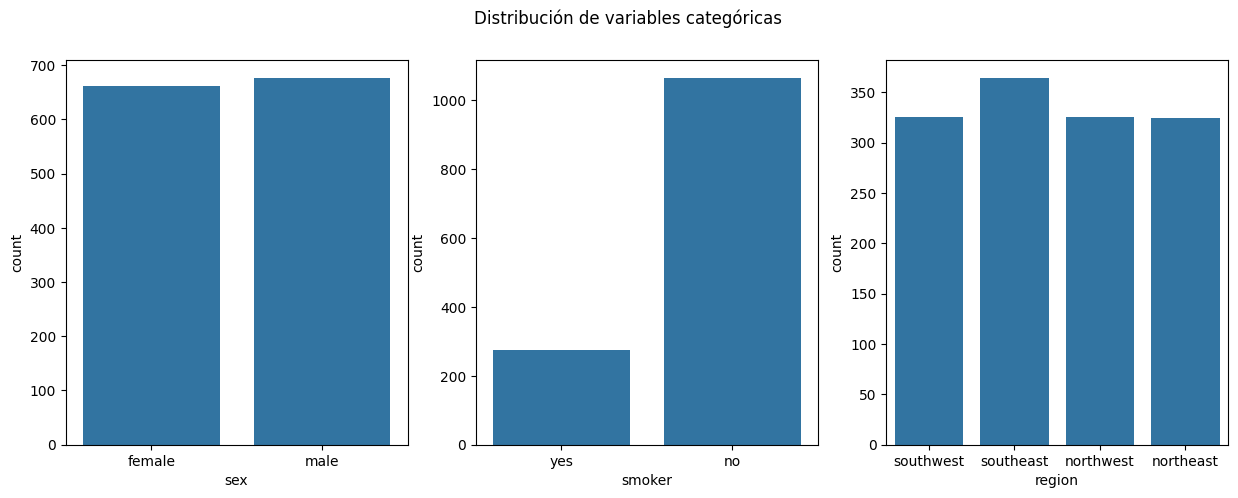

In [8]:
# Frecuencia de variables categóricas
print("\nSexo de la persona:")
print(df['sex'].value_counts())
print("\nFrecuencia de fumador:")
print(df['smoker'].value_counts())
print("\nFrecuencia de procedencia':")
print(df['region'].value_counts())

# Gráficos de barras
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='sex', data=df, ax=axes[0])
sns.countplot(x='smoker', data=df, ax=axes[1])
sns.countplot(x='region', data=df, ax=axes[2])
plt.suptitle("Distribución de variables categóricas")
plt.show()

#Se puede ver como hay más hombres que mujeres pero por poca diferencia (14)
#Hay mucha menos gente que fuma de la que fuma, la diferencia es de casi 800 personas
#La region está bastante igualada siendo la diferencia minima

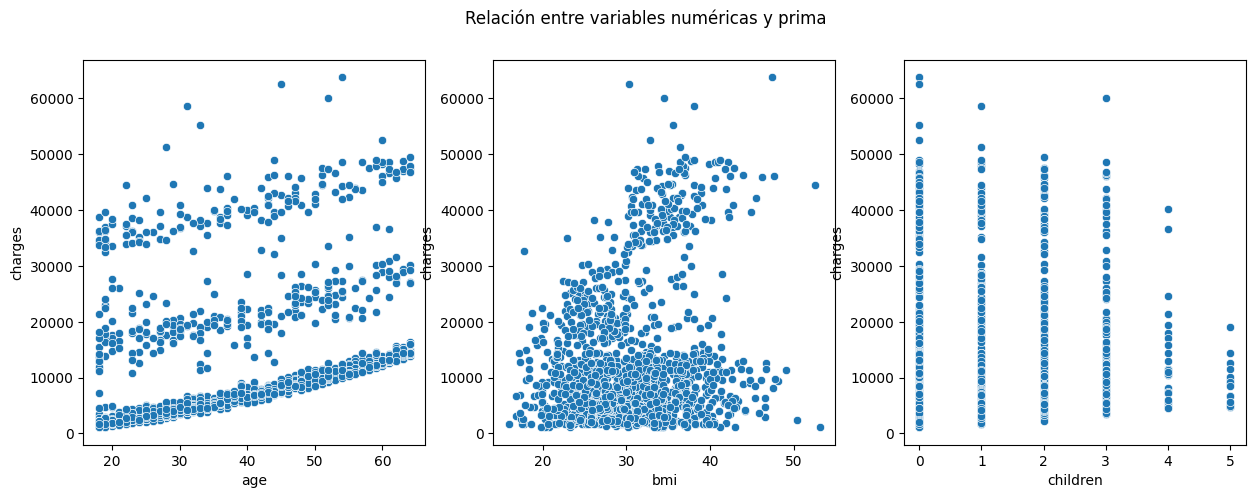

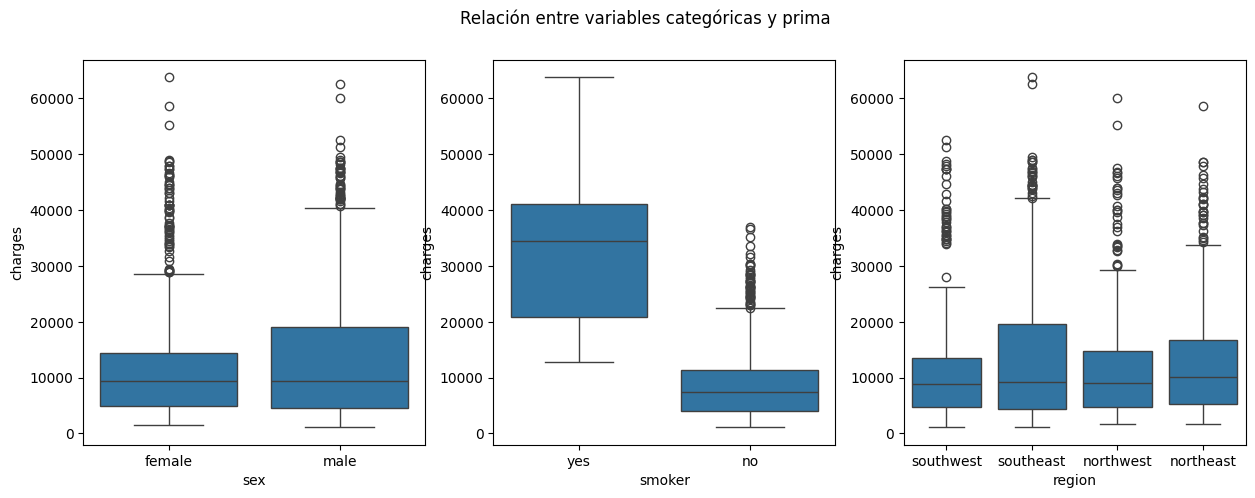

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='age', y='charges', data=df, ax=axes[0])
sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[1])
sns.scatterplot(x='children', y='charges', data=df, ax=axes[2])
plt.suptitle("Relación entre variables numéricas y prima")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='sex', y='charges', data=df, ax=axes[0])
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[1])
sns.boxplot(x='region', y='charges', data=df, ax=axes[2])
plt.suptitle("Relación entre variables categóricas y prima")
plt.show()

In [39]:
#Se puede ver como cuantos más años el coste es mayor que es algo que es normal
#También se puede ver que cuanto más indice corporal la gente paga más aunque hay pocas personas con indices de 50 que paguen seguros.
#Por último podemos ver que cuantos más hijos tienen las personas menos pagan, esto seguramente sea por que tienen menos capacidad adquisitiva.
#Luego podemos ver que los homvres tienden a tener costes un poco mayores que las mujeres y los fumadores costes bastante mayores a los no fumadores.
# Eliminar filas con valores faltantes
df = df.dropna()

# Variables categóricas
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Dataset con cambios
print("\nDataset transformado:")
print(df.head())


Dataset transformado:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [29]:

X = df.drop('charges', axis=1)
y = df['charges']

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X e y
print("\nDimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)


Dimensiones de X_train: (1070, 8)
Dimensiones de X_test: (268, 8)


In [34]:


# Modelo de regresión
model = LinearRegression()

# Lo entrenamos
model.fit(X_train, y_train)

# Predecimos
y_pred = model.predict(X_test)

# Evaluamos

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regresión Lineal - Resultados:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R2): {r2}")

Regresión Lineal - Resultados:
Error Cuadrático Medio (MSE): 33596915.851361446
Coeficiente de Determinación (R2): 0.7835929767120724


In [41]:
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Características seleccionadas:", selected_features)

# Mejoramos el modelo con las caracteristicas seleccionadas
model.fit(X_train[selected_features], y_train)
y_pred_rfe = model.predict(X_test[selected_features])

mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print("\nRegresión Lineal con RFE - Resultados:")
print(f"MSE: {mse_rfe}")
print(f"R2: {r2_rfe}")
#Al eliminar la variable age los resultados no son favorables sobre la regresión lineal primera

Características seleccionadas: Index(['bmi', 'children', 'smoker_yes', 'region_southeast',
       'region_southwest'],
      dtype='object')

Regresión Lineal con RFE - Resultados:
MSE: 46825693.380929574
R2: 0.6983827633824445


In [40]:

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nRidge Regression")
print(f"MSE: {mse_ridge}")
print(f"R2: {r2_ridge}")

print("\nLasso Regression")
print(f"MSE: {mse_lasso}")
print(f"R2: {r2_lasso}")
#Podemos ver una mejora de los resultados frente al modelo lineal aunque la mejora es poca


Ridge Regression
MSE: 33645037.09177904
R2: 0.7832830144988214

Lasso Regression
MSE: 33597770.054583974
R2: 0.7835874745529608
